In [1]:
import pandas as pd
data = pd.read_csv('Preprocessed2.csv')

In [2]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,label
0,12,5,3,1,1,2,1,1,1,0,...,4,0,0,1,1,3,3,1,1,0
1,1,3,3,1,1,1,1,4,0,0,...,5,1,0,1,1,1,1,1,2,0
2,10,5,5,1,1,4,11,2,0,1,...,7,0,0,1,1,1,1,1,2,0
3,6,2,6,2,0,5,7,1,0,1,...,8,1,0,1,4,1,1,1,1,0
4,1,5,1,1,1,2,2,2,1,0,...,5,0,0,1,1,1,1,1,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15419 non-null  int64  
 1   WeekOfMonth           15419 non-null  int64  
 2   DayOfWeek             15419 non-null  int64  
 3   Make                  15419 non-null  int64  
 4   AccidentArea          15419 non-null  int64  
 5   DayOfWeekClaimed      15419 non-null  int64  
 6   MonthClaimed          15419 non-null  int64  
 7   WeekOfMonthClaimed    15419 non-null  int64  
 8   Sex                   15419 non-null  int64  
 9   MaritalStatus         15419 non-null  int64  
 10  Age                   15419 non-null  float64
 11  Fault                 15419 non-null  int64  
 12  PolicyType            15419 non-null  int64  
 13  VehicleCategory       15419 non-null  int64  
 14  VehiclePrice          15419 non-null  int64  
 15  RepNumber          

In [4]:
from sklearn.utils import resample

In [5]:
#majority class -> class with label == "Legitimate/not fraud"
data_majority = data[(data['label']==0)]
#minority class
data_minority = data[(data['label']==1)]

In [6]:
# upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= len(data_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_minority_upsampled, data_majority])

In [7]:
# upsample minority class
data_majority_undersampled = resample(data_majority, 
                                 replace=False,    # sample with replacement
                                 n_samples= len(data_minority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data_undersampled = pd.concat([data_majority_undersampled, data_minority])

In [8]:
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 1554 to 15417
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 28992 non-null  int64  
 1   WeekOfMonth           28992 non-null  int64  
 2   DayOfWeek             28992 non-null  int64  
 3   Make                  28992 non-null  int64  
 4   AccidentArea          28992 non-null  int64  
 5   DayOfWeekClaimed      28992 non-null  int64  
 6   MonthClaimed          28992 non-null  int64  
 7   WeekOfMonthClaimed    28992 non-null  int64  
 8   Sex                   28992 non-null  int64  
 9   MaritalStatus         28992 non-null  int64  
 10  Age                   28992 non-null  float64
 11  Fault                 28992 non-null  int64  
 12  PolicyType            28992 non-null  int64  
 13  VehicleCategory       28992 non-null  int64  
 14  VehiclePrice          28992 non-null  int64  
 15  RepNumber       

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = data_undersampled

In [11]:
cat_cols = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'MaritalStatus', 'DayOfWeekClaimed', 
                       'MonthClaimed', 'WeekOfMonthClaimed','PolicyType', 'VehicleCategory', 'VehiclePrice', 
                      'RepNumber', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 
                      'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 
                      'AddressChange-Claim', 'NumberOfCars', 'Year']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [12]:
X = data.iloc[:,:-1]
y = data['label'].array

In [13]:
#split into stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=39, stratify = y)
train, test = train_test_split(data, test_size=0.34, random_state=39, stratify = data['label'])
print(len(train[train['label'] == 1]) / len(train))
print(len(test[test['label'] == 1]) / len(test))

0.5
0.5


In [14]:
selector = SelectKBest(chi2, k =15)
selector.fit(X_train, y_train)
X_kbest = X_train.iloc[:, selector.get_support()]
test_kbest = X_test.iloc[:, selector.get_support()]

In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=15))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
mod = model.fit(X_kbest, y_train, validation_data=(test_kbest, y_test), epochs=100, batch_size=100)

Train on 1218 samples, validate on 628 samples
Epoch 1/100
1218/1218 [==============================] - 1s 672us/step - loss: 1.0818 - accuracy: 0.5222 - val_loss: 0.7221 - val_accuracy: 0.5032
Epoch 2/100
1218/1218 [==============================] - 0s 124us/step - loss: 0.6976 - accuracy: 0.5402 - val_loss: 0.6940 - val_accuracy: 0.5334
Epoch 3/100
1218/1218 [==============================] - 0s 125us/step - loss: 0.6500 - accuracy: 0.6117 - val_loss: 0.6988 - val_accuracy: 0.6226
Epoch 4/100
1218/1218 [==============================] - 0s 118us/step - loss: 0.6661 - accuracy: 0.6125 - val_loss: 0.6416 - val_accuracy: 0.5892
Epoch 5/100
1218/1218 [==============================] - 0s 128us/step - loss: 0.6131 - accuracy: 0.6724 - val_loss: 0.6179 - val_accuracy: 0.6449
Epoch 6/100
1218/1218 [==============================] - 0s 118us/step - loss: 0.6015 - accuracy: 0.6757 - val_loss: 0.6145 - val_accuracy: 0.6290
Epoch 7/100
1218/1218 [==============================] - 0s 120us/step 

1218/1218 [==============================] - 0s 116us/step - loss: 0.4827 - accuracy: 0.7578 - val_loss: 0.5604 - val_accuracy: 0.7134
Epoch 57/100
1218/1218 [==============================] - 0s 114us/step - loss: 0.4564 - accuracy: 0.7833 - val_loss: 0.5551 - val_accuracy: 0.7436
Epoch 58/100
1218/1218 [==============================] - 0s 137us/step - loss: 0.4600 - accuracy: 0.7874 - val_loss: 0.5567 - val_accuracy: 0.7532
Epoch 59/100
1218/1218 [==============================] - 0s 116us/step - loss: 0.4463 - accuracy: 0.7791 - val_loss: 0.5531 - val_accuracy: 0.7166
Epoch 60/100
1218/1218 [==============================] - 0s 114us/step - loss: 0.4587 - accuracy: 0.7783 - val_loss: 0.5481 - val_accuracy: 0.7134
Epoch 61/100
1218/1218 [==============================] - 0s 118us/step - loss: 0.4363 - accuracy: 0.7964 - val_loss: 0.6045 - val_accuracy: 0.7484
Epoch 62/100
1218/1218 [==============================] - 0s 116us/step - loss: 0.4537 - accuracy: 0.7816 - val_loss: 0.5607 

Text(91.68, 0.5, 'Actual label')

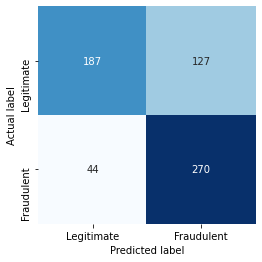

In [18]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(test_kbest) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [19]:
(203+273)/(203+273+111+41)

0.7579617834394905

In [20]:
X_kbest

,Month,MonthClaimed,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange-Claim,BasePolicy
15360,2,2,0,30.0,1,3,1,2,16,0,6,5,1,1,1
7664,11,11,1,31.0,1,6,3,1,4,0,5,5,2,5,2
11122,3,4,1,37.0,1,5,3,0,11,0,7,6,2,1,3
4731,6,7,0,28.0,1,6,3,2,10,2,5,5,4,3,2
10440,3,3,1,30.0,1,6,3,1,10,0,6,5,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,3,4,0,35.0,1,2,1,5,9,0,6,5,1,1,2
894,1,2,0,24.0,1,6,3,2,12,2,5,4,4,1,2
9865,2,2,0,44.0,1,5,3,5,8,0,7,6,3,1,3
6329,9,9,0,35.0,1,5,3,0,4,1,5,5,1,1,3


In [21]:
y_train

<PandasArray>
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
 ...
 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]
Length: 1218, dtype: int64

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_kbest,y_train)
y_pred = clf.predict(test_kbest)
print(accuracy_score(y_test,y_pred))

0.7563694267515924


Text(91.68, 0.5, 'Actual label')

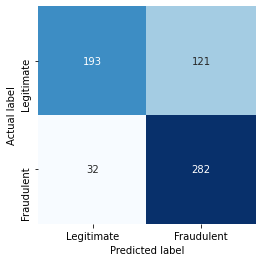

In [23]:
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# VarianceThreshold

In [24]:
from sklearn.feature_selection import VarianceThreshold

In [64]:
sel = VarianceThreshold(threshold=0.3)

In [65]:
X = sel.fit_transform(X)

In [66]:
len(x[0])

18

In [67]:
#split into stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=39, stratify = y)
train, test = train_test_split(data, test_size=0.34, random_state=39, stratify = data['label'])
print(len(train[train['label'] == 1]) / len(train))
print(len(test[test['label'] == 1]) / len(test))

0.5
0.5


In [68]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=18))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
mod = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Train on 1218 samples, validate on 628 samples
Epoch 1/100
1218/1218 [==============================] - 1s 531us/step - loss: 11.6417 - accuracy: 0.5000 - val_loss: 7.8588 - val_accuracy: 0.5000
Epoch 2/100
1218/1218 [==============================] - 0s 124us/step - loss: 5.0852 - accuracy: 0.5049 - val_loss: 4.5190 - val_accuracy: 0.5000
Epoch 3/100
1218/1218 [==============================] - 0s 121us/step - loss: 3.8252 - accuracy: 0.4852 - val_loss: 4.1005 - val_accuracy: 0.5000
Epoch 4/100
1218/1218 [==============================] - 0s 116us/step - loss: 4.6241 - accuracy: 0.4918 - val_loss: 5.0575 - val_accuracy: 0.5000
Epoch 5/100
1218/1218 [==============================] - 0s 122us/step - loss: 3.1890 - accuracy: 0.4885 - val_loss: 3.4861 - val_accuracy: 0.5000
Epoch 6/100
1218/1218 [==============================] - 0s 119us/step - loss: 2.9899 - accuracy: 0.5189 - val_loss: 4.5490 - val_accuracy: 0.5000
Epoch 7/100
1218/1218 [==============================] - 0s 116us/step

1218/1218 [==============================] - 0s 120us/step - loss: 0.8094 - accuracy: 0.5525 - val_loss: 0.6683 - val_accuracy: 0.6099
Epoch 57/100
1218/1218 [==============================] - 0s 117us/step - loss: 0.7437 - accuracy: 0.5616 - val_loss: 0.7521 - val_accuracy: 0.5717
Epoch 58/100
1218/1218 [==============================] - 0s 120us/step - loss: 0.7071 - accuracy: 0.5739 - val_loss: 0.9278 - val_accuracy: 0.5016
Epoch 59/100
1218/1218 [==============================] - 0s 117us/step - loss: 0.8176 - accuracy: 0.5525 - val_loss: 0.6883 - val_accuracy: 0.5430
Epoch 60/100
1218/1218 [==============================] - 0s 116us/step - loss: 0.6907 - accuracy: 0.5903 - val_loss: 1.1960 - val_accuracy: 0.5000
Epoch 61/100
1218/1218 [==============================] - 0s 119us/step - loss: 0.9787 - accuracy: 0.5123 - val_loss: 0.7671 - val_accuracy: 0.5669
Epoch 62/100
1218/1218 [==============================] - 0s 118us/step - loss: 0.8979 - accuracy: 0.5345 - val_loss: 1.0518 

Text(91.68, 0.5, 'Actual label')

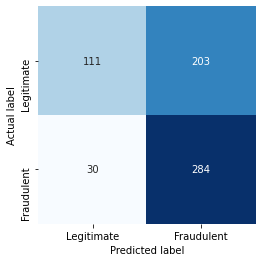

In [70]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6114649681528662


Text(91.68, 0.5, 'Actual label')

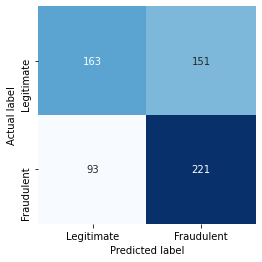

In [74]:
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Tree Based feature classifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
from sklearn.feature_selection import SelectFromModel

In [95]:
X = data.iloc[:,:-1]
y = data['label'].array

In [96]:
clf = ExtraTreesClassifier(n_estimators=60)

In [97]:
clf = clf.fit(X, y)

In [98]:
clf.feature_importances_

array([0.04234129, 0.0364092 , 0.03870295, 0.0357077 , 0.01397783,
       0.03601496, 0.04460056, 0.03789345, 0.01359364, 0.01946788,
       0.04458761, 0.12554404, 0.03013896, 0.06130106, 0.03559648,
       0.03868262, 0.01791299, 0.03417751, 0.00236057, 0.00154583,
       0.0364262 , 0.03361348, 0.03442491, 0.00647169, 0.00052924,
       0.00265396, 0.03150613, 0.02488071, 0.00956903, 0.03794702,
       0.07142048])

In [99]:
model = SelectFromModel(clf, prefit=True)

In [100]:
X_new = model.transform(X)

/Users/shivambhardwaj/opt/miniconda3/envs/keras_env/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [101]:
X_new.shape

(1846, 18)

In [102]:
#split into stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.34, random_state=39, stratify = y)
train, test = train_test_split(data, test_size=0.34, random_state=39, stratify = data['label'])
print(len(train[train['label'] == 1]) / len(train))
print(len(test[test['label'] == 1]) / len(test))

0.5
0.5


In [103]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=18))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
mod = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Train on 1218 samples, validate on 628 samples
Epoch 1/100
1218/1218 [==============================] - 1s 529us/step - loss: 1.6311 - accuracy: 0.4967 - val_loss: 1.1385 - val_accuracy: 0.5000
Epoch 2/100
1218/1218 [==============================] - 0s 120us/step - loss: 1.0477 - accuracy: 0.5016 - val_loss: 0.8655 - val_accuracy: 0.5000
Epoch 3/100
1218/1218 [==============================] - 0s 121us/step - loss: 0.7255 - accuracy: 0.5476 - val_loss: 0.6766 - val_accuracy: 0.5557
Epoch 4/100
1218/1218 [==============================] - 0s 120us/step - loss: 0.6841 - accuracy: 0.5796 - val_loss: 0.6995 - val_accuracy: 0.5557
Epoch 5/100
1218/1218 [==============================] - 0s 119us/step - loss: 0.6927 - accuracy: 0.5673 - val_loss: 0.6545 - val_accuracy: 0.6210
Epoch 6/100
1218/1218 [==============================] - 0s 119us/step - loss: 0.6210 - accuracy: 0.6486 - val_loss: 0.6411 - val_accuracy: 0.6608
Epoch 7/100
1218/1218 [==============================] - 0s 116us/step 

1218/1218 [==============================] - 0s 118us/step - loss: 0.3949 - accuracy: 0.8235 - val_loss: 0.6447 - val_accuracy: 0.6879
Epoch 57/100
1218/1218 [==============================] - 0s 118us/step - loss: 0.3959 - accuracy: 0.8186 - val_loss: 0.5967 - val_accuracy: 0.7166
Epoch 58/100
1218/1218 [==============================] - 0s 117us/step - loss: 0.3806 - accuracy: 0.8374 - val_loss: 0.6164 - val_accuracy: 0.7182
Epoch 59/100
1218/1218 [==============================] - 0s 115us/step - loss: 0.4047 - accuracy: 0.8169 - val_loss: 0.7519 - val_accuracy: 0.6497
Epoch 60/100
1218/1218 [==============================] - 0s 121us/step - loss: 0.4283 - accuracy: 0.8021 - val_loss: 0.8112 - val_accuracy: 0.6783
Epoch 61/100
1218/1218 [==============================] - 0s 117us/step - loss: 0.4623 - accuracy: 0.7800 - val_loss: 0.6203 - val_accuracy: 0.6975
Epoch 62/100
1218/1218 [==============================] - 0s 115us/step - loss: 0.3842 - accuracy: 0.8227 - val_loss: 0.6505 

Text(91.68, 0.5, 'Actual label')

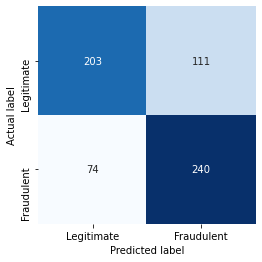

In [105]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7547770700636943


Text(91.68, 0.5, 'Actual label')

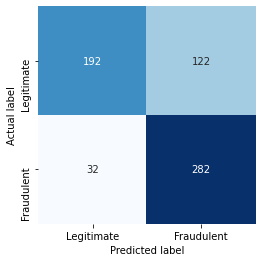

In [107]:
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')